#### **Цель** данной работы заключается в исследовании и сравнении различных методов классификации на на основе исторических метеорологических данных, работа будет заключаться в предсказании типа погоды на основе имеющихся метеорологических данных о осадках, максимальной и минимальной температуре, скорости ветра.


#### **Задачи** исследования включают в себя:
1. Изучение существующих методов классификации:
   - Основные методы классификации.
   - Сравнить преимущества и недостатки каждого метода.

2. Выбор набора данных

3. Предобработка данных:
   - Провести анализ данных и выполнить предобработку (обработка пропущенных значений, кодирование категориальных признаков, масштабирование и т.д.).

4. Разделение данных и обучение моделей:
   - Разделить данные на обучающую и тестовую выборки.
   - Обучить различные методы классификации на обучающих данных.

5. Оценка качества моделей:
   - Оценить качество моделей на тестовых данных с использованием метрик, таких как accuracy, precision, recall, F1-score.
   - Провести сравнительный анализ результатов для различных методов.

6. Визуализация результатов:
   - Построить графики или диаграммы для визуализации результатов сравнения методов классификации на выбранных наборах данных.

7. Анализ полученных результатов:
   - Сравнение эффективности различных методов классификации и выбор наилучшего подхода для предсказания типа погоды на основе заданных признаков.


Применение результатов данного исследования может быть полезным для улучшения точности прогнозирования погоды на основе имеющихся данных, что может быть полезно для различных отраслей, где прогноз погоды играет важную роль.


#### **Метрики**

Метрики accuracy, precision, recall и F1-score являются основными метриками, используемыми для оценки моделей классификации.

Вот почему каждая из этих метрик важна:

1. Accuracy (точность): Это простейшая метрика, которая показывает долю правильно классифицированных объектов относительно всех объектов. Она полезна, когда все классы равнозначны или когда ошибки в разных классах равноценны. Однако accuracy может быть обманчива, если классы несбалансированы (например, 90% объектов принадлежат к одному классу), поэтому важно использовать и другие метрики.

2. Precision (точность): Precision измеряет долю объектов, предсказанных как положительные и при этом действительно являющихся положительными.

3. Recall (полнота): Recall измеряет долю истинных положительных объектов, которые были предсказаны как положительные.

4. F1-score: F1-score является средним гармоническим precision и recall. Эта метрика учитывает как точность, так и полноту модели. F1-score хорошо работает в случаях несбалансированных классов, когда accuracy может быть вводящей в заблуждение.

Комбинация этих метрик позволяет получить более полное представление о производительности модели классификации, учитывая как правильные предсказания, так и ошибки модели.

## Описание Датасета

### <h3>DataSet Link</h3>   

 https://www.kaggle.com/ananthr1/weather-prediction

Датасет содержит информацию о погодных условиях, он включает в себя следующие столбцы:
* precipitation (осадки) - количество осадков, выпавших за определенный период времени(Все выпавшие осадки измеряются в миллиметрах (мм) и принимают, что 1 мм осадков соответствует 1 л. воды на 1 кв. м. площади.)

* temp_max (максимальная температура) - самая высокая температура в течение дня(в градусах по Цельсию)
* temp_min (минимальная температура) - самая низкая температура в течение дня(в градусах по Цельсию)
* wind (ветер) - скорость ветра(в метрах в секунду)

Задача состоит в прогнозировании погодных условий, которые могут быть следующими:
* drizzle (морось) - легкие дождевые осадки
* rain (дождь) - дождевые осадки
* sun (солнце) - ясная погода без осадков
* snow (снег) - снегопад или снег
* fog (туман) - атмосферное явление, при котором видимость снижена из-за тумана

Мы можем использовать данные о количестве осадков, температуре, скорости ветра и других параметрах для построения модели прогнозирования погодных условий на основе указанных категорий.

Данные в датасете представлены с 2012-2015г

## Загрузка библиотек

In [ ]:
#Библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Загрузка Дататсета

In [ ]:
#Загрузка датасета
data = pd.read_csv("/content/Копия seattle-weather.csv")

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


## Предварительный анализ данных


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
#Проверка пропущенных значений
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

В датасете пропущенные значения отсутствуют

### Анализ признаков и предобработка данных

In [ ]:
# Преобразование столбца 'дата' в тип данных datetime
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

Гистограмма, показывающая дисбаланс классов в столбце 'weather'(погода).

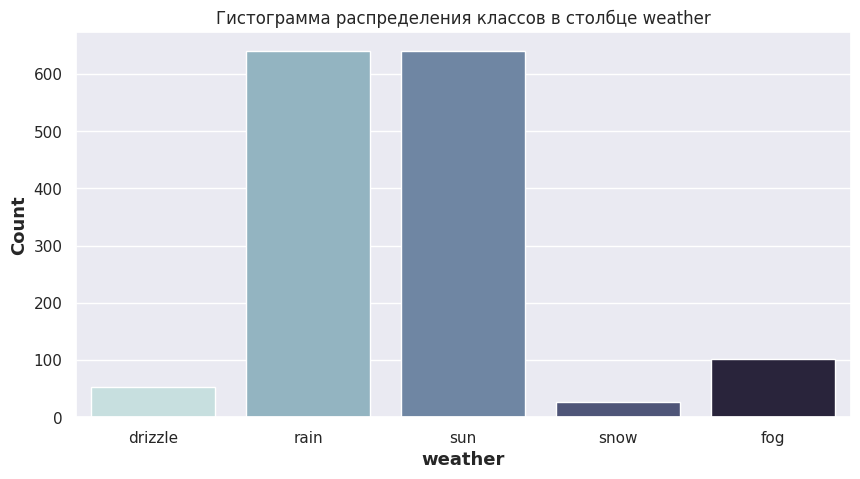

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.title('Гистограмма распределения классов в столбце weather')
plt.show()

На гистограмме видно, что присутствует преобладание классов rain и sun

График, отображающий изменение максимальной температуры ('temp_max') со временем ('date').

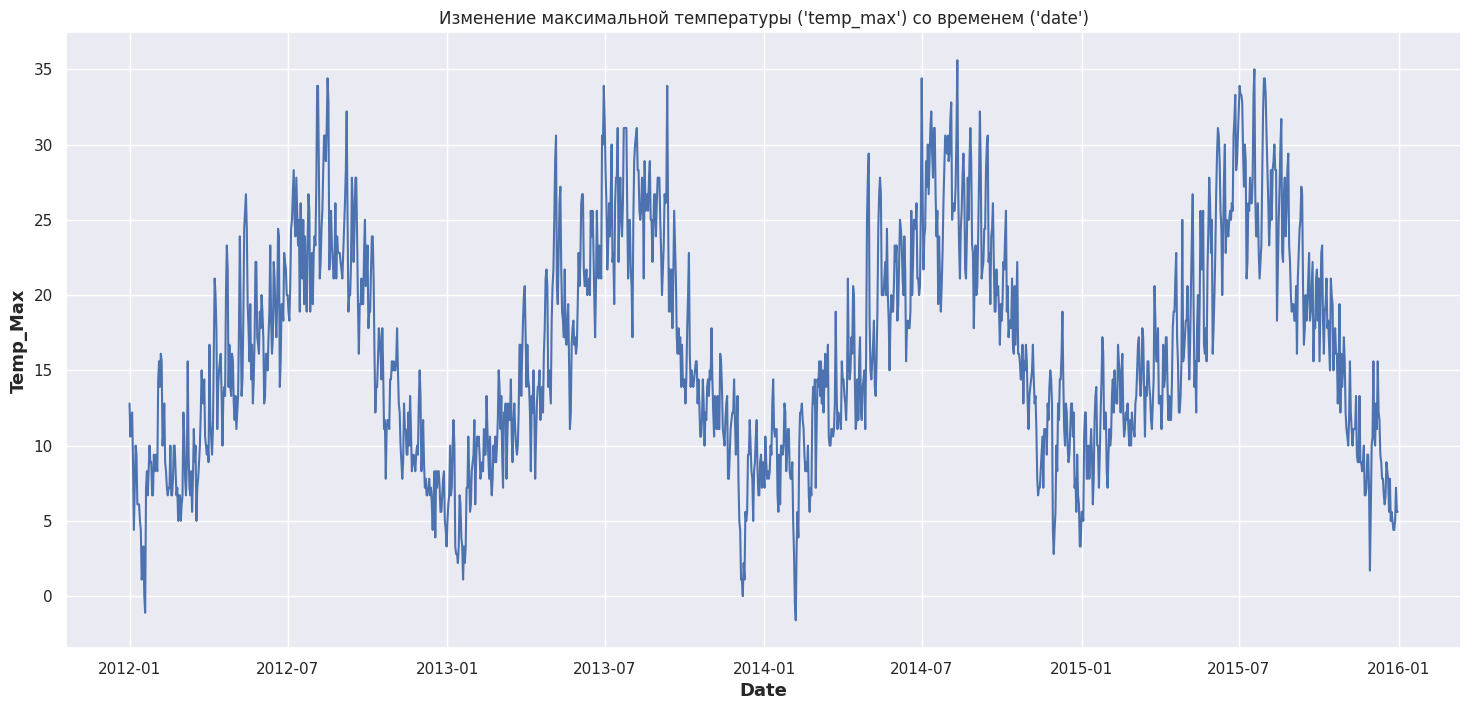

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x='date', y='temp_max', data=data)
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Temp_Max", fontweight='bold', size=13)
plt.title("Изменение максимальной температуры ('temp_max') со временем ('date')")
plt.show()

График, показывающий как меняется минимальная температура со временем.

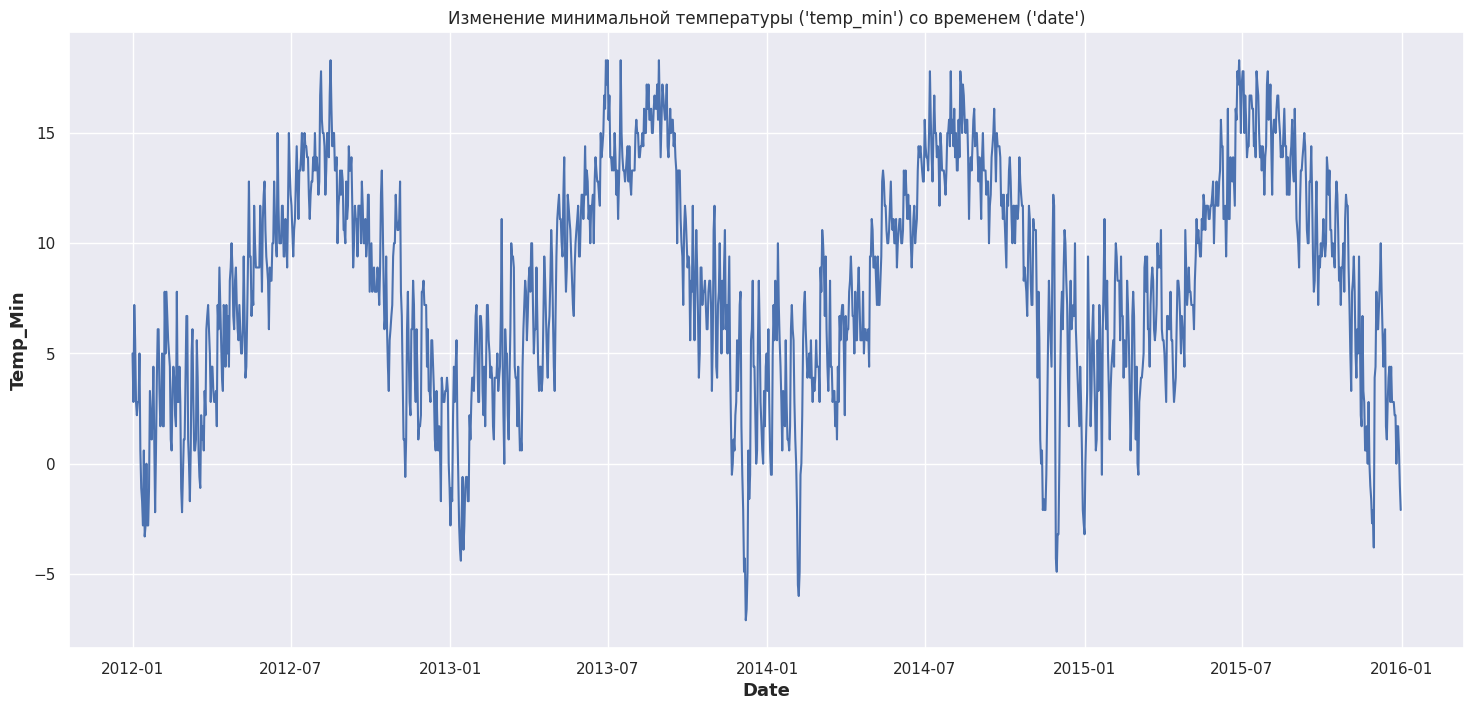

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.title("Изменение минимальной температуры ('temp_min') со временем ('date')")
plt.show()

В изменении максимальной и минимальной температуры присутствует сезонность.

График, показывающий как меняется скорость ветра со временем.

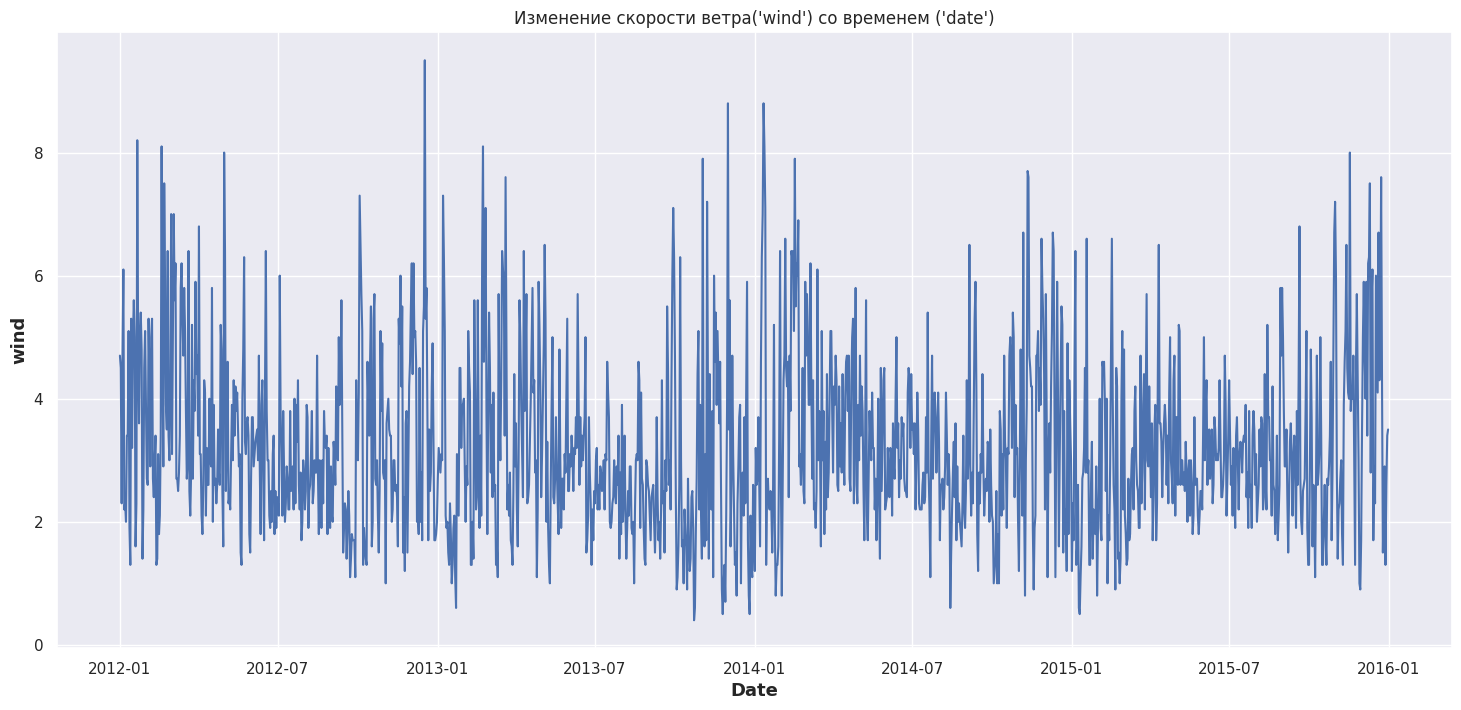

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.title("Изменение скорости ветра('wind') со временем ('date')")
plt.show()

Изучим числовые признаки на диаграммах рассеивания с раскраской точек в соответствии с типом погоды('weather'). Каждая точка на графике представляет собой наблюдение (строку в данных), а различные цвета отражают разные типы погоды.

Это помогает визуализировать взаимосвязи между различными числовыми переменными в зависимости от типа погоды.

<Figure size 1400x800 with 0 Axes>

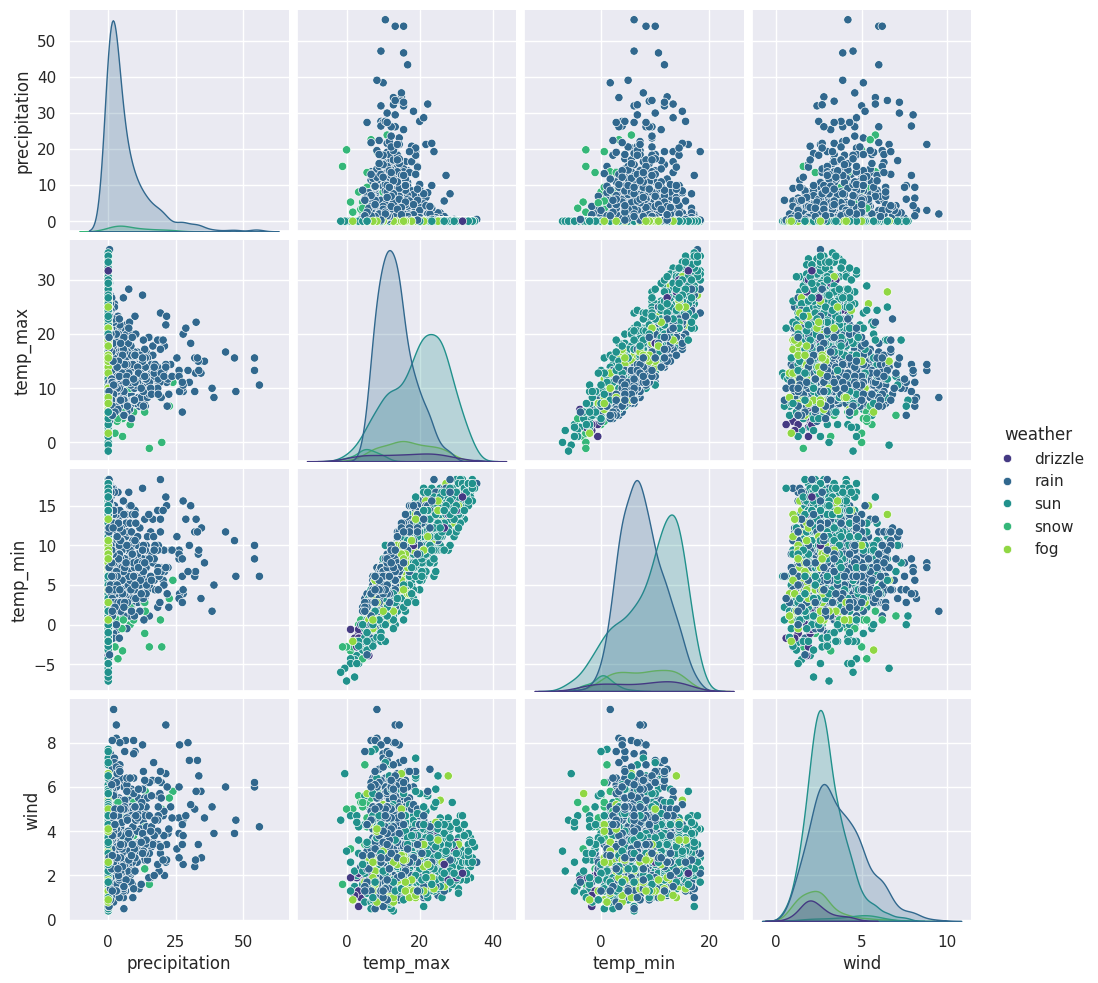

In [ ]:
plt.figure(figsize=(14, 8))
sns.pairplot(data.drop('date', axis=1), hue='weather', palette='viridis')
plt.show()


Для более детального анализа, проанализирую взаимосвзяь между кажым признаком и типом погоды.


Диаграмма на которой отображается взаимосвязь между максимальной температурой (по оси y) и типом погоды (по оси x). Каждая точка на графике представляет собой наблюдение (строку в данных), а цвет точек соответствует разным типам погоды.

График позволяет визуально сравнить максимальные температуры в разных типах погоды.

<Figure size 1000x500 with 0 Axes>

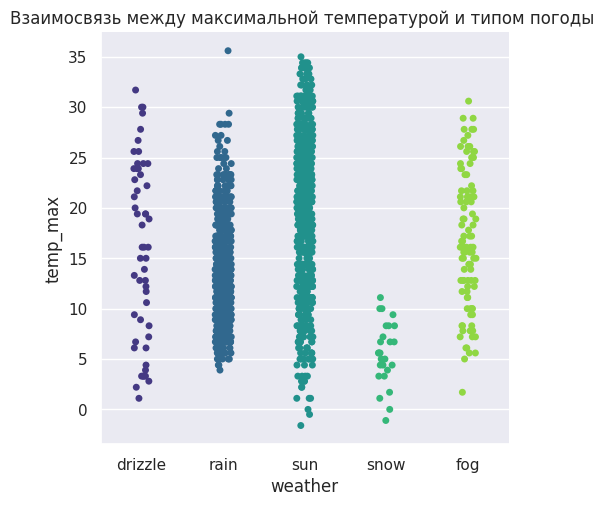

In [ ]:
plt.figure(figsize=(10, 5))
sns.catplot(x='weather', y='temp_max', data=data, palette='viridis')
plt.title("Взаимосвязь между максимальной температурой и типом погоды ")
plt.show()

При анализе максимальной температуры, можно сделать вывод, что дождь чаще всего идет при температуре 5-25 градусов. Снег встречается при температуре 0-10 градусов.

Визуализация, как минимальные температуры зависят от типа погоды

<Figure size 1000x500 with 0 Axes>

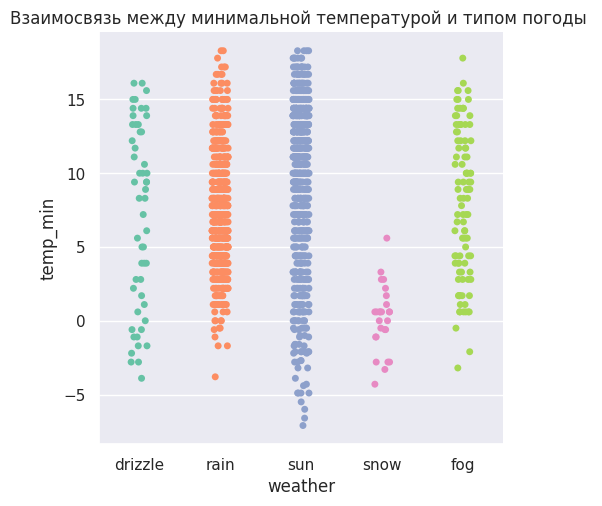

In [ ]:
plt.figure(figsize=(10, 5))
sns.catplot(x='weather', y='temp_min', data=data, palette='Set2')
plt.title("Взаимосвязь между минимальной температурой и типом погоды ")
plt.show()

При анализе маинимальной температуры, можно сделать вывод, что дождь чаще всего идет при температуре 5-15 градусов. Снег встречается при температуре (-5)-5 градусов.

Визуализация,как скорость ветра зависит от типа погоды

<Figure size 1000x500 with 0 Axes>

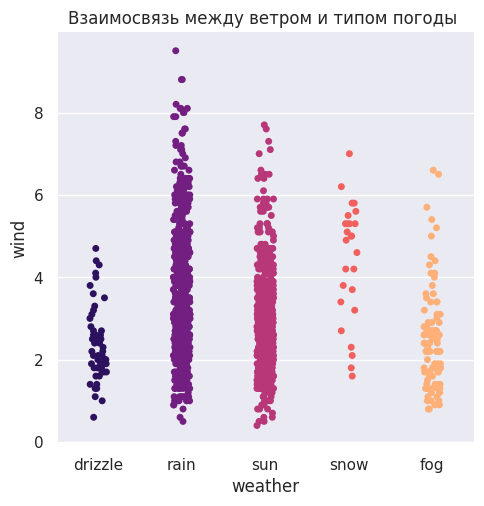

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=data,palette = "magma")
plt.title("Взаимосвязь между ветром и типом погоды ")
plt.show()

Визуализация, как количество осадков зависит от типа погоды

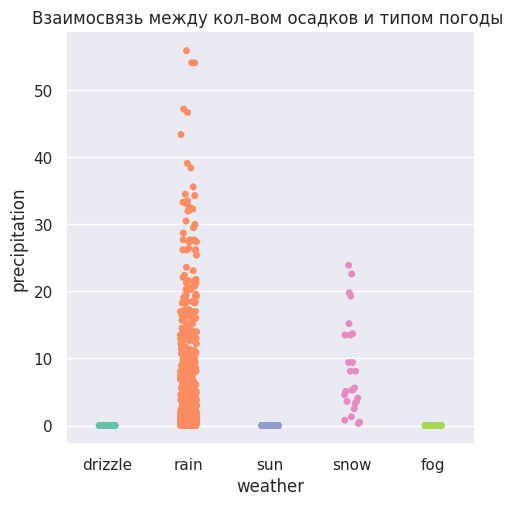

In [ ]:
sns.catplot(x='weather',y ='precipitation',data=data,palette = "Set2")
plt.title("Взаимосвязь между кол-вом осадков и типом погоды ")
plt.show()

Сравним взаимосвязь между типом погоды и различными факторами (количество осадков, максимальная и минимальная температуры, скорость ветра) на четырех графиках рассеяния.

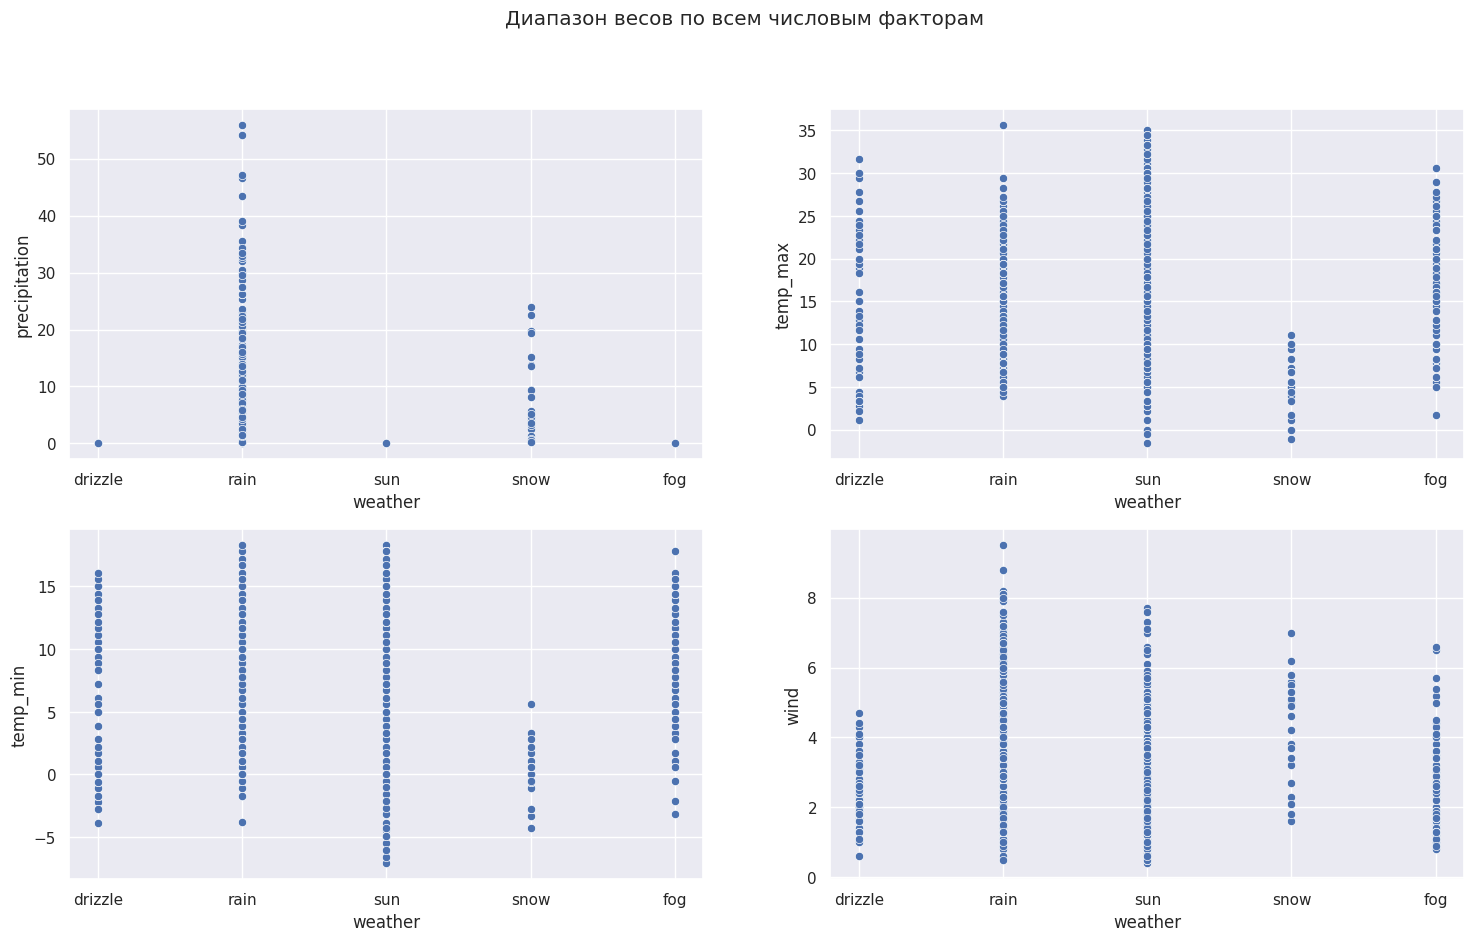

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Диапазон весов по всем числовым факторам')

sns.scatterplot(ax=axes[0, 0], data=data, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=data, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=data, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=data, x='weather', y='wind')
plt.show()

Преобразуем значения в столбце "weather" из строковых категорий в числовые метки с помощью Label Encoding

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data["weather"] = label_encoder.fit_transform(data["weather"])
data["weather"].unique()
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


Уникальные закодированные значения: [0 2 4 3 1]

Соответствующие декодированные значения: ['drizzle' 'rain' 'sun' 'snow' 'fog']


In [ ]:
data = data.drop('date',axis=1)
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [ ]:
x = data.drop('weather',axis=1)
y = data['weather']

## Разделение на train и test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


### Feature Scaling Приведение значений признаков к одному масштабу

Стандартизация (Standardization): Преобразует значения признаков так, чтобы они имели среднее значение 0 и стандартное отклонение 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Обучение моделей на тестовой выборке

## Logistic Regression

Логистическая регрессия (Logistic Regression) - это один из методов машинного обучения, который используется для решения задач классификации.

Основным элементом логистической регрессии является логистическая функция (или сигмоидная функция), которая преобразует выход модели в диапазон от 0 до 1, интерпретируемый как вероятность. После обучения модели на обучающих данных, она может использоваться для предсказания класса новых объектов на основе их признаков.

In [ ]:
from sklearn.linear_model import LogisticRegression

import time
start_time = time.time()
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

training_time1 = time.time() - start_time
print(f"Время обучения модели: {training_time1} секунд")

Время обучения модели: 0.03205561637878418 секунд


In [ ]:
y_pred = classifier.predict(X_test)

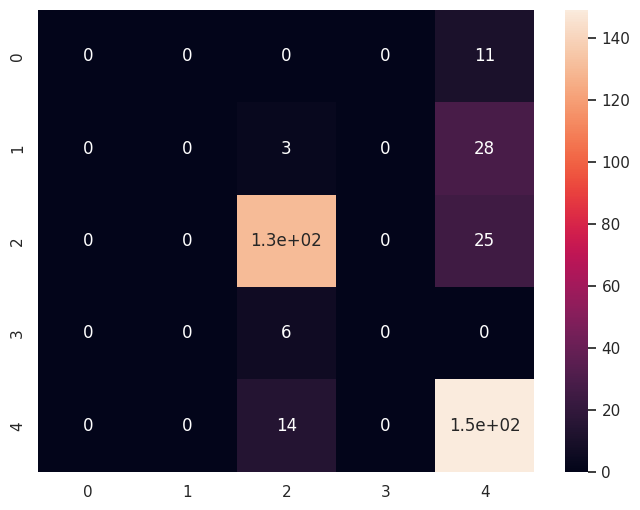

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
acc1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)
print(f"Accuracy score: {acc1}")

Precision: 0.6713738267312365
Recall: 0.7622950819672131
F1 Score: 0.7104653717402235
Accuracy score: 0.7622950819672131


## SVM

Метод опорных векторов (Support Vector Machine, SVM)

 Основной идеей SVM является построение оптимальной гиперплоскости, которая разделяет данные на классы таким образом, чтобы максимизировать расстояние между этой гиперплоскостью и ближайшими к ней точками обучающей выборки, называемыми опорными векторами.

Алгорит метода опорных векторов:
1. SVM строит гиперплоскости, разделяющие каждую пару классов друг от друга.
2. Для каждой пары классов SVM создает двоичный классификатор.
3. Для многоклассовой классификации используются различные стратегии, такие как One-vs-All (один против всех) или One-vs-One (один против одного), где комбинации классов обрабатываются по-разному.
4. SVM стремится максимизировать зазор между классами и минимизировать ошибку классификации.
5. Для нелинейных данных применяются ядровые функции для преобразования признаков в пространство более высокой размерности.
6. Параметры SVM, такие как параметр регуляризации и выбор ядра, могут быть настроены для оптимальной производительности.


In [ ]:
from sklearn.svm import SVC

import time
start_time = time.time()
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

training_time2 = time.time() - start_time
print(f"Время обучения модели: {training_time2} секунд")

Время обучения модели: 0.04308795928955078 секунд


In [ ]:
y_pred = classifier.predict(X_test)

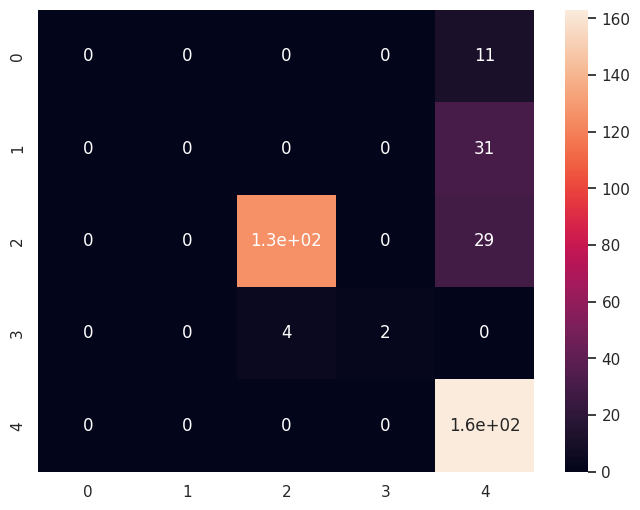

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()
acc2 = accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
acc2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)
print(f"Accuracy score: {acc2}")

Precision: 0.7370860772500116
Recall: 0.7950819672131147
F1 Score: 0.7483647488461418
Accuracy score: 0.7950819672131147


## K-NN model

K-Nearest Neighbors (K-NN)

Основная идея K-NN заключается в том, что объекты данных, которые близки друг к другу в пространстве признаков, склонны принадлежать к одному классу (для задач классификации) или иметь похожие значения целевой переменной (для задач регрессии).

Алгоритм K-NN работает следующим образом: для нового объекта данных он находит K ближайших к нему соседей из обучающей выборки (где K - это параметр, определяющий количество соседей), затем присваивает новому объекту тот класс или значение целевой переменной, который является наиболее популярным среди соседей (для задач классификации) или усредняет значения целевой переменной среди соседей (для задач регрессии).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import time
start_time = time.time()
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

training_time3 = time.time() - start_time
print(f"Время обучения модели: {training_time3} секунд")

Время обучения модели: 0.003729581832885742 секунд


В данном случае 'minkowski' означает обобщенное расстояние Минковского, которое может быть настроено параметром p.

In [ ]:
y_pred = classifier.predict(X_test)

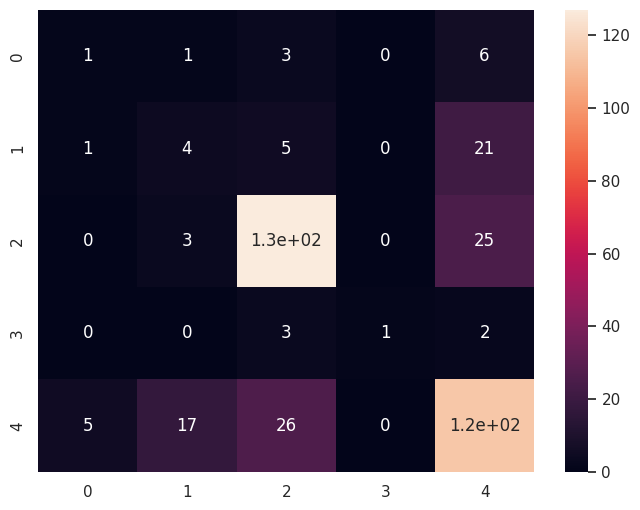

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
acc3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred, average='weighted')
recall3 = recall_score(y_test, y_pred, average='weighted')
f13 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)
print(f"Accuracy score: {acc3}")

Precision: 0.6652433774306564
Recall: 0.6775956284153005
F1 Score: 0.6658570874638083
Accuracy score: 0.6775956284153005


Изменю n_neighbors = 100

In [ ]:
import time
start_time = time.time()
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Время обучения модели: {training_time} секунд")

Время обучения модели: 0.005571603775024414 секунд


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
acc3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred, average='weighted')
recall3 = recall_score(y_test, y_pred, average='weighted')
f13 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)
print(f"Accuracy score: {acc3}")

Precision: 0.6278905004624801
Recall: 0.7213114754098361
F1 Score: 0.67101342878319
Accuracy score: 0.7213114754098361


Видим, что при изменении n_neighbors качество модели не стало лучше.

## Naive Bayes

Наивный Байес (Naive Bayes) - это простой и эффективный алгоритм машинного обучения, основанный на теореме Байеса. Он используется для решения задач классификации, где требуется определить к какому классу принадлежит объект на основе его признаков.

Основная идея алгоритма Наивный Байес заключается в предположении о независимости признаков объекта относительно классов. То есть, он считает, что каждый признак влияет на класс объекта независимо от других признаков. Это "наивное" предположение делает алгоритм вычислительно эффективным и легким в реализации.

Для обучения модели Наивного Байеса используются данные с известными признаками объектов и их классами. На этапе обучения алгоритм оценивает вероятности появления каждого признака для каждого класса. Затем, для нового объекта, алгоритм вычисляет вероятность принадлежности к каждому классу на основе полученных вероятностей и выбирает класс с наибольшей вероятностью.

In [ ]:
from sklearn.naive_bayes import GaussianNB

import time
start_time = time.time()
classifier = GaussianNB()
classifier.fit(X_train, y_train)

training_time4 = time.time() - start_time
print(f"Время обучения модели: {training_time4} секунд")

Время обучения модели: 0.0030176639556884766 секунд


In [ ]:
y_pred = classifier.predict(X_test)

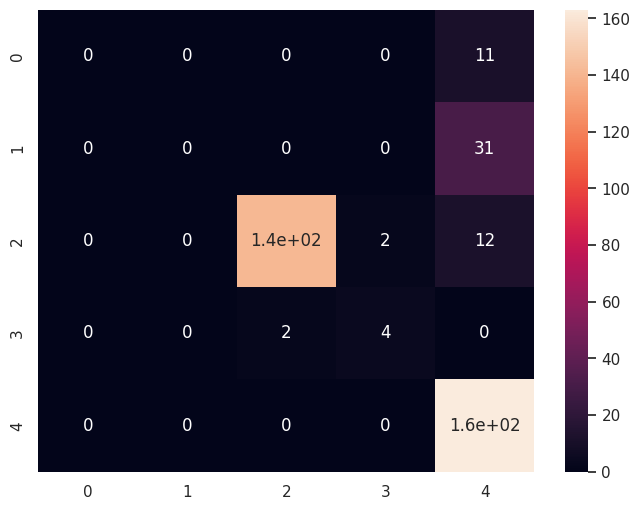

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
acc4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred, average='weighted')
recall4 = recall_score(y_test, y_pred, average='weighted')
f14 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f14)
print(f"Accuracy score: {acc4}")

Precision: 0.7630326662584728
Recall: 0.8415300546448088
F1 Score: 0.7937559957766569
Accuracy score: 0.8415300546448088


## Decision Tree Classification

Decision Tree Classification (дерево принятия решений). Метод представляет собой древовидную структуру, где каждый узел представляет собой признак, каждое ребро - возможное значение этого признака, а листовой узел - класс, к которому объект относится.

Основная идея дерева принятия решений заключается в разбиении пространства признаков на подмножества таким образом, чтобы в каждом подмножестве объекты принадлежали к одному классу. Для этого алгоритм строит дерево, делая последовательные разбиения по признакам, чтобы минимизировать неопределенность (impurity) и увеличить чистоту (purity) получаемых подмножеств.

На этапе обучения дерево принятия решений выбирает оптимальные признаки и пороги для разбиения данных таким образом, чтобы достичь наилучшего качества классификации. Это может быть реализовано различными критериями, такими как критерий Джини, энтропия Шеннона или ошибка классификации.

После построения дерева на этапе обучения, для нового объекта алгоритм проходит по дереву, сравнивая значения его признаков с условиями разбиения, и определяет класс объекта на основе листового узла, в который он попадает.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

import time
start_time = time.time()
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

training_time5 = time.time() - start_time
print(f"Время обучения модели: {training_time5} секунд")

Время обучения модели: 0.008212089538574219 секунд


In [ ]:
y_pred = classifier.predict(X_test)

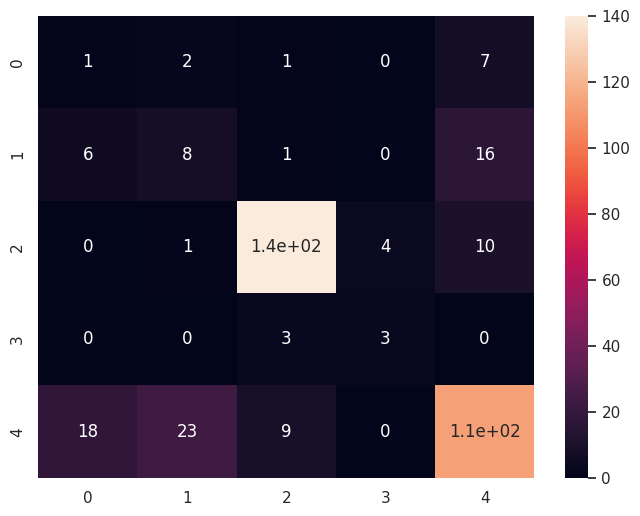

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
acc5 = accuracy_score(y_test, y_pred)
precision5 = precision_score(y_test, y_pred, average='weighted')
recall5 = recall_score(y_test, y_pred, average='weighted')
f15 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f15)
print(f"Accuracy score: {acc5}")

Precision: 0.7578474627709116
Recall: 0.7240437158469946
F1 Score: 0.7395656120867008
Accuracy score: 0.7240437158469946


## Random Forest Classifier

Random Forest Classifier (случайный лес) - это ансамблевый метод машинного обучения, который основан на построении множества деревьев принятия решений и комбинировании их результатов для улучшения качества классификации. Random Forest является одним из наиболее эффективных и широко используемых алгоритмов классификации.

Основная идея Random Forest заключается в том, что он создает ансамбль деревьев принятия решений, каждое из которых обучается на случайной подвыборке данных (bootstrap sample) и использует случайное подмножество признаков (feature subset) для построения дерева. При прогнозировании класса нового объекта каждое дерево в лесу выносит свое решение, а затем результаты агрегируются (например, путем голосования), чтобы принять окончательное решение.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

import time
start_time = time.time()
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)

training_time6 = time.time() - start_time
print(f"Время обучения модели: {training_time6} секунд")

RandomForestClassifier(n_estimators=40, random_state=0)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

Время обучения модели: 0.16572856903076172 секунд


<Axes: >

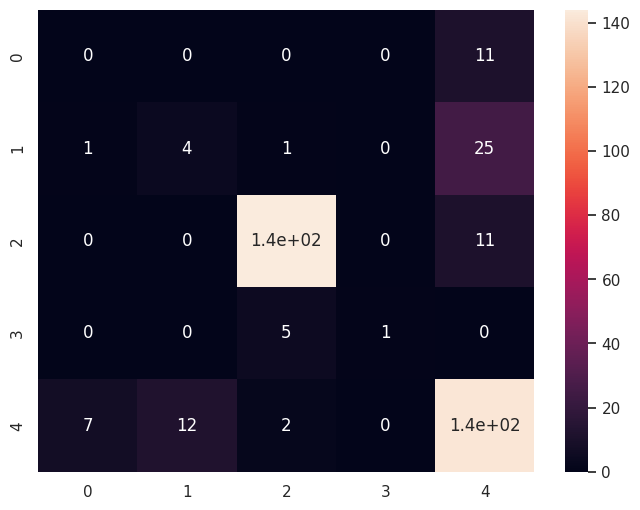

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.25      0.13      0.17        31
           2       0.95      0.93      0.94       155
           3       1.00      0.17      0.29         6
           4       0.75      0.87      0.81       163

    accuracy                           0.80       366
   macro avg       0.59      0.42      0.44       366
weighted avg       0.77      0.80      0.78       366



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
acc6 = accuracy_score(y_test, y_pred)
precision6 = precision_score(y_test, y_pred, average='weighted')
recall6 = recall_score(y_test, y_pred, average='weighted')
f16 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)
print(f"Accuracy score: {acc6}")

Precision: 0.7733817314993615
Recall: 0.7950819672131147
F1 Score: 0.7757087738227014
Accuracy score: 0.7950819672131147


## XGBoost

XGBoost (Extreme Gradient Boosting) - это мощный алгоритм машинного обучения, который относится к классу градиентного бустинга. Он является одним из наиболее эффективных и популярных алгоритмов для задач классификации, регрессии и ранжирования.

Основная идея XGBoost заключается в построении ансамбля слабых моделей (обычно деревьев решений) последовательно, при этом каждая новая модель исправляет ошибки предыдущих моделей. XGBoost использует градиентный спуск для минимизации функции потерь, что позволяет улучшить качество модели на каждой итерации.

In [ ]:
from xgboost import XGBClassifier

import time
start_time = time.time()
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

training_time7 = time.time() - start_time
print(f"Время обучения модели: {training_time7} секунд")

Время обучения модели: 0.4961588382720947 секунд


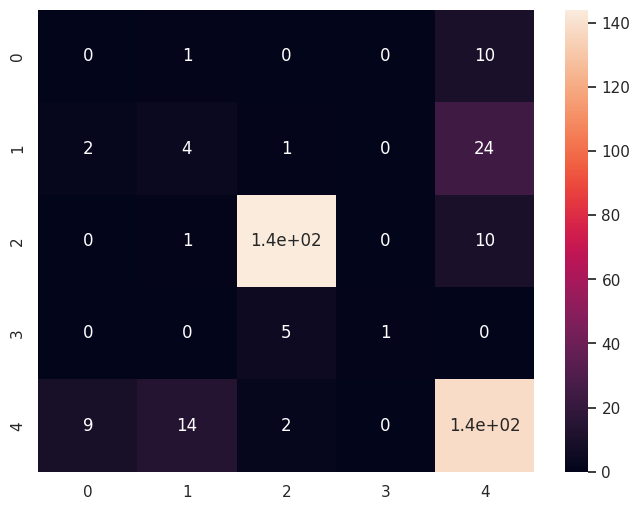

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()
acc7 = accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
acc7 = accuracy_score(y_test, y_pred)
precision7 = precision_score(y_test, y_pred, average='weighted')
recall7 = recall_score(y_test, y_pred, average='weighted')
f17 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision7)
print("Recall:", recall7)
print("F1 Score:", f17)
print(f"Accuracy score: {acc7}")

Precision: 0.7722281744714876
Recall: 0.7841530054644809
F1 Score: 0.7715415216833427
Accuracy score: 0.7841530054644809


# Оценка результатов

## Визуализация для каждой построенной модели по метрике Accuracy





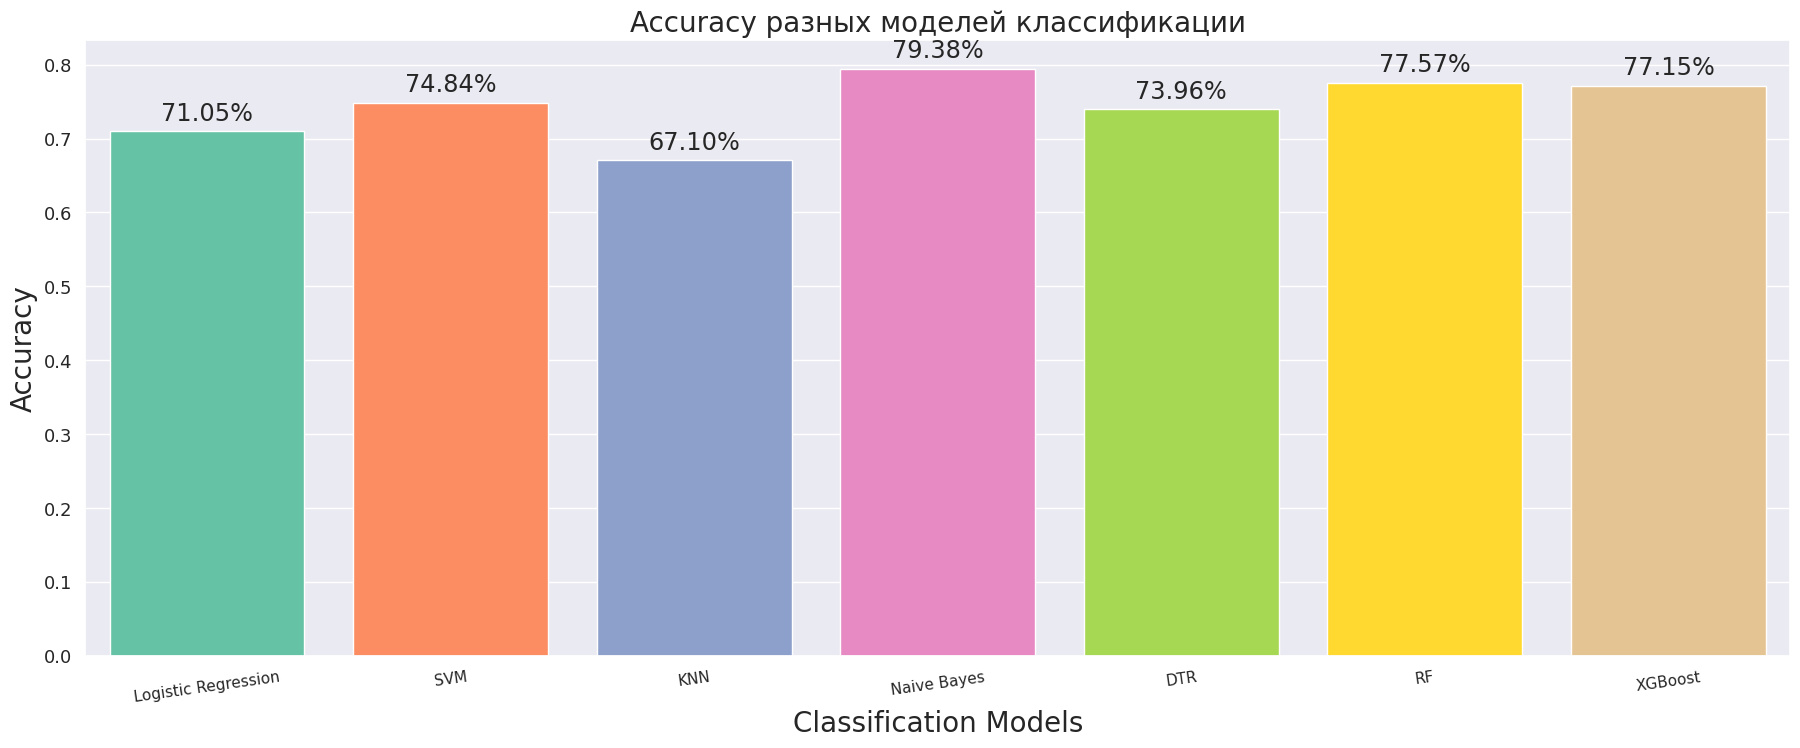

In [ ]:
mylist=[]
mylist2=[]
mylist.append(f11)
mylist2.append("Logistic Regression")
mylist.append(f12)
mylist2.append("SVM")
mylist.append(f13)
mylist2.append("KNN")
mylist.append(f14)
mylist2.append("Naive Bayes")
mylist.append(f15)
mylist2.append("DTR")
mylist.append(f16)
mylist2.append("RF")
mylist.append(f17)
mylist2.append("XGBoost")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "Set2", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy разных моделей классификации", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Визуализация для каждой построенной модели по метрике F1 score

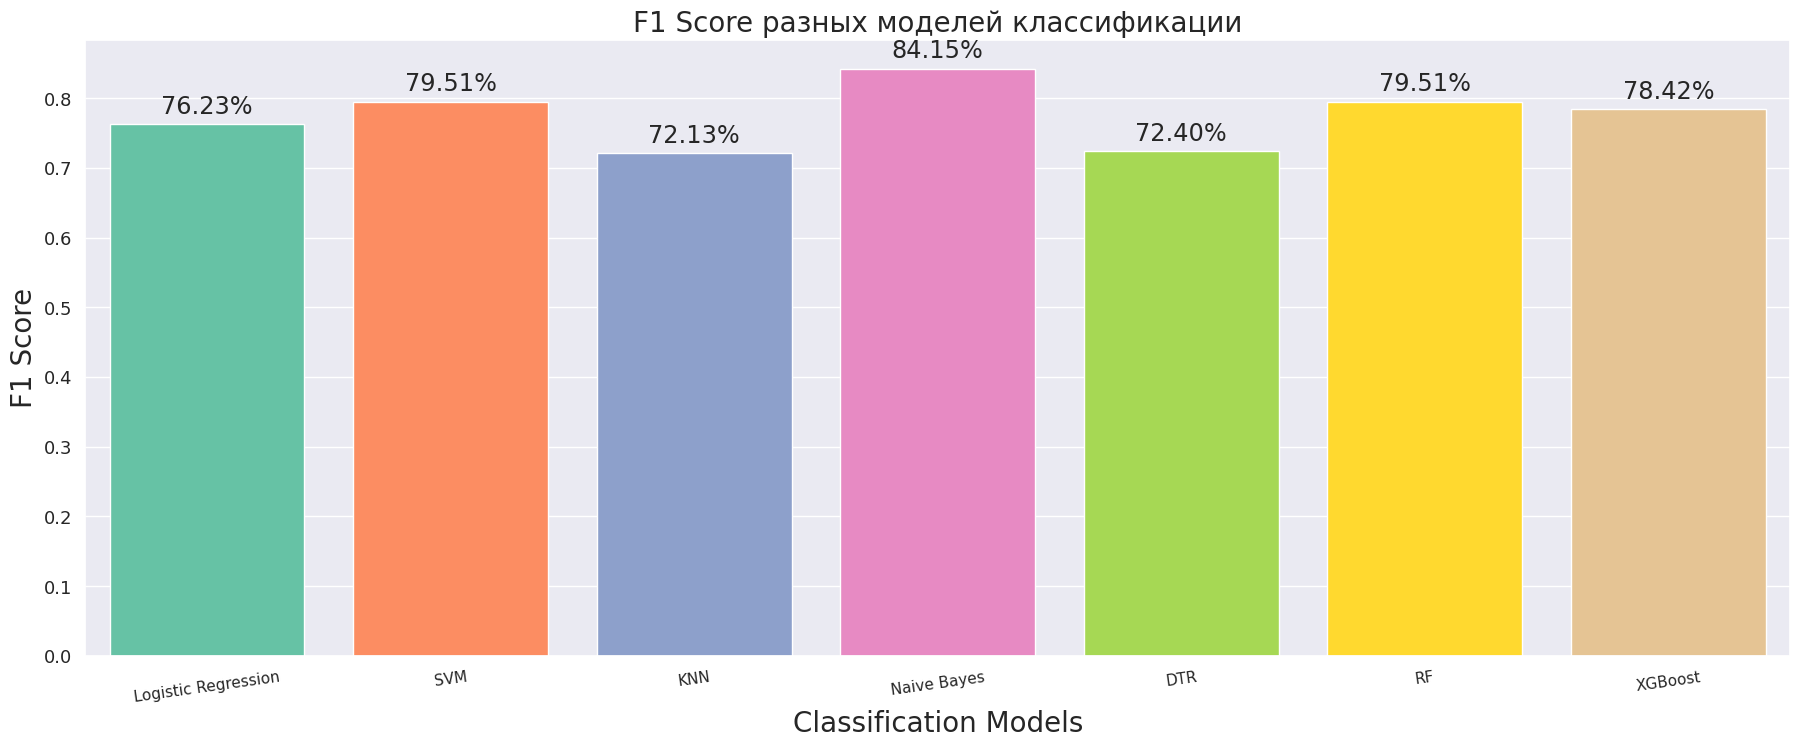

In [ ]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RF")
mylist.append(acc7)
mylist2.append("XGBoost")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "Set2", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("F1 Score", fontsize = 20)
plt.title("F1 Score разных моделей классификации", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()


Исходя из предоставленных результатов, можно провести сравнительный анализ качества различных
алгоритмов машинного обучения для решения задачи классификации для предсказания погоды:

1)Naive Bayes показывает наилучшее качество с точки зрения всех метрик оценки

2)SVM и RF также показывают хорошие результаты с близкими значениями метрик
качества

3)LR и XGBoost демонстрируют немного меньшую точность, но всё равно достаточно приемлемые
результаты

4)KNN показывает наихудшее качество среди представленных алгоритмов

Основываясь на метриках Accuracy, Precision, Recall и F1-Score, можно сделать вывод, что Naive Bayes
показывает наилучшее качество, а K-Nearest Neighbors  - наихудшее качество для данной
задачи классификации.

## Визуализация для каждой построенной модели с временем ее обучения

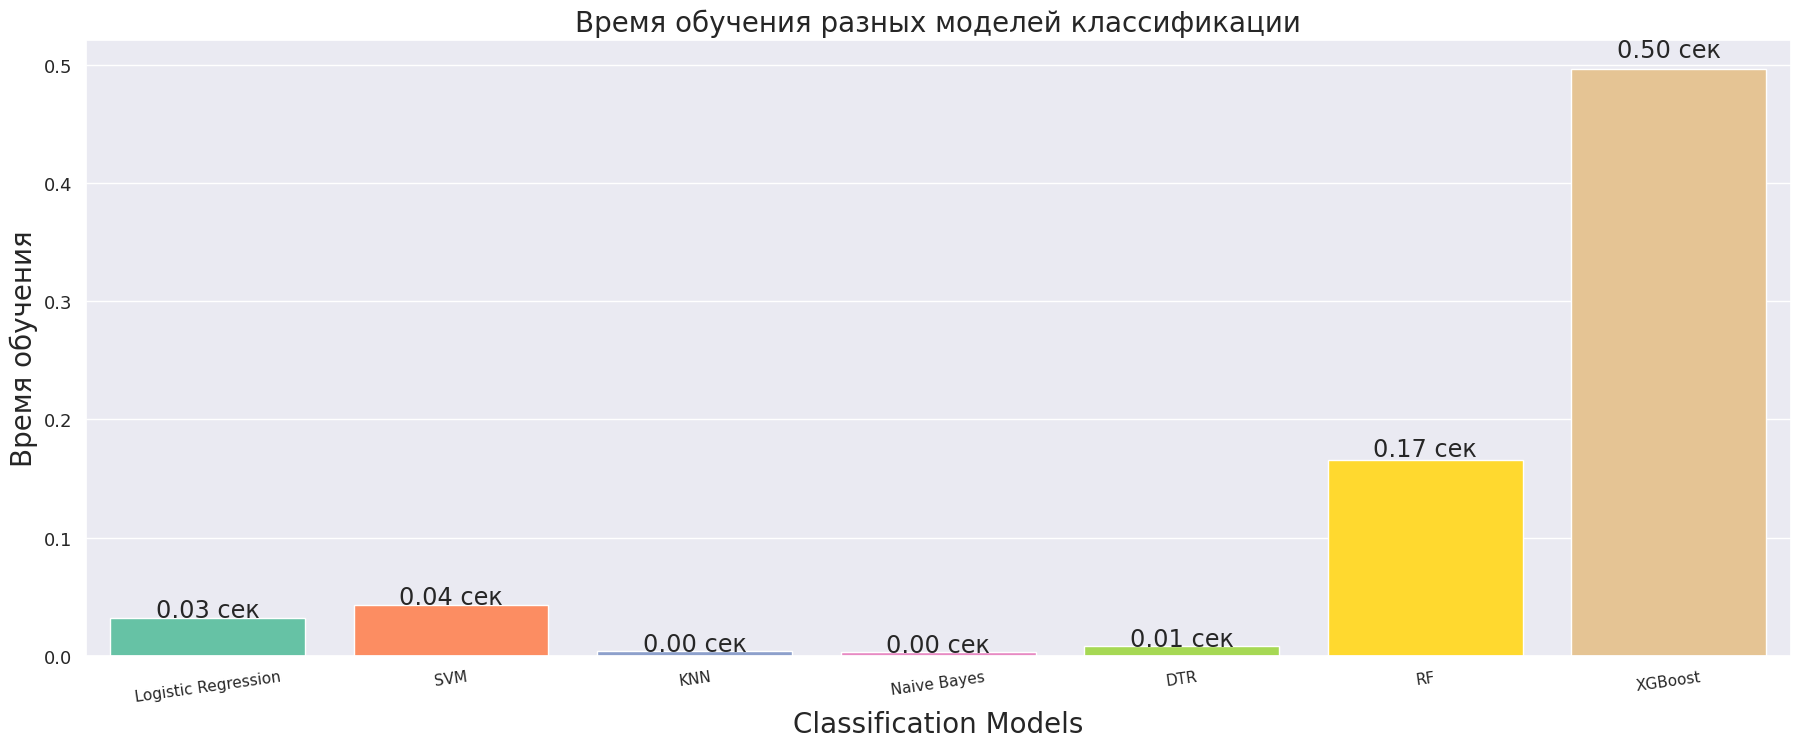

In [ ]:
mylist = []
mylist2 = []
mylist.append(training_time1)
mylist2.append("Logistic Regression")
mylist.append(training_time2)
mylist2.append("SVM")
mylist.append(training_time3)
mylist2.append("KNN")
mylist.append(training_time4)
mylist2.append("Naive Bayes")
mylist.append(training_time5)
mylist2.append("DTR")
mylist.append(training_time6)
mylist2.append("RF")
mylist.append(training_time7)
mylist2.append("XGBoost")

plt.rcParams['figure.figsize'] = 8, 6
sns.set_style("darkgrid")
plt.figure(figsize=(22, 8))
ax = sns.barplot(x=mylist2, y=mylist, palette="Set2", saturation=1.5)
plt.xlabel("Classification Models", fontsize=20)
plt.ylabel("Время обучения", fontsize=20)
plt.title("Время обучения разных моделей классификации", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f} сек', (x + width/2, y + height * 1.02), ha='center', fontsize='x-large')

plt.show()

По гистограмме видно, что быстрее вего обучается модель KNN, Naive Bayes и DTR, дольше всего RF и XGBoost

Наиболее перспективная модель - Naive Bayes для решения поставленной задачи. Построю кривые обучения, чтобы проверить, что отсутствует недообучение и переобучение.

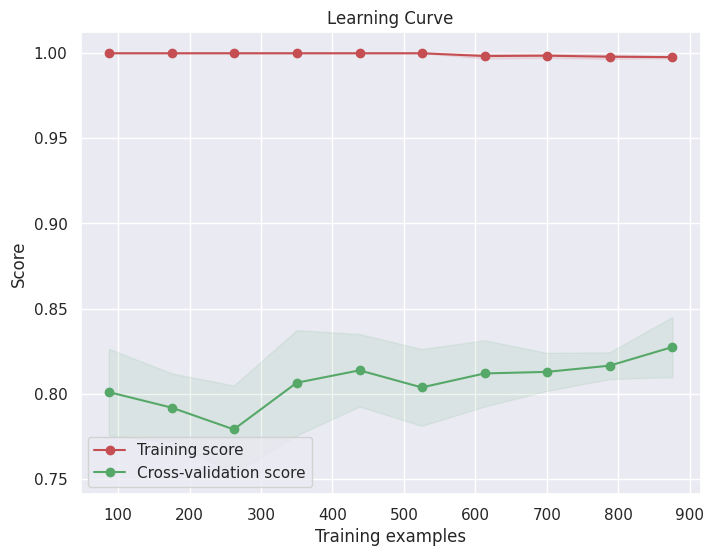

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


На графике видно, что переобучение и недообучение отсутствуют.

Для поиска оптимальных гиперпараметров применю GridSearchCV для классификатора Gaussian Naive Bayes:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определение параметров для подбора
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Использование модели с лучшими параметрами
best_classifier = grid_search.best_estimator_
y_pred_best = best_classifier.predict(X_test)

# Оценка точности с учетом лучших параметров
acc_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print("Precision (лучшие параметры):", precision_best)
print("Recall (лучшие параметры):", recall_best)
print("F1 Score (лучшие параметры):", f1_best)
print(f"Accuracy score (лучшие параметры): {acc_best}")


Лучшие параметры: {'priors': None, 'var_smoothing': 1e-09}
Precision (лучшие параметры): 0.7630326662584728
Recall (лучшие параметры): 0.8415300546448088
F1 Score (лучшие параметры): 0.7937559957766569
Accuracy score (лучшие параметры): 0.8415300546448088


После GridSearchCV точность стала больше, однако F1-score уменьшился

GridSearchCV может быть менее эффективным для наивного байесовского классификатора по сравнению с другими моделями из-за его простоты и основных предположений о данных.

Есть несколько причин, почему GridSearchCV может быть менее эффективен для наивного байесовского классификатора:

1. Независимость признаков: Наивный байесовский классификатор предполагает, что все признаки независимы между собой, что редко выполняется в реальных данных. Из-за этого модель может не получить значительного улучшения от настройки параметров.

2. Ограниченные гиперпараметры: Наивный байесовский классификатор имеет ограниченное количество гиперпараметров для настройки, что ограничивает пространство поиска GridSearchCV и его способность улучшить производительность модели.

### **Подводя итог**, рассмторим преимущества и недостатки построенных моделей:

1. Логистическая регрессия:
   - *Преимущества*: Простота, хорошо интерпретируемы коэффициенты.
   - *Недостатки*: Линейные границы разделения, неспособность моделировать сложные зависимости.

2. Метод опорных векторов (SVM):
   - *Преимущества*: Эффективен в пространствах высокой размерности, хорошо работает с нелинейными данными.
   - *Недостатки*: Требует тщательной настройки параметров, может быть затратным по вычислительным ресурсам.

3. Метод k-ближайших соседей (KNN):
   - *Преимущества*: Прост в реализации, хорошо работает для нелинейных данных.
   - *Недостатки*: Требует много памяти для хранения обучающего набора данных, чувствителен к выбору числа соседей.

4. Наивный байесовский классификатор:
   - *Преимущества*: Прост в реализации, хорошо работает с текстовыми данными.
   - *Недостатки*: Наивное предположение о независимости признаков может быть неверным.

5. Деревья принятия решений (DTR):
   - *Преимущества*: Хорошо интерпретируемы, способны работать с нелинейными данными.
   - *Недостатки*: Склонны к переобучению.

6. Случайный лес (RF):
   - *Преимущества*: Устойчив к переобучению, хорошо работает с большими наборами данных.
   - *Недостатки*: Может быть медленным в обучении и предсказаниях.

7. XGBoost:
   - *Преимущества*: Высокая точность, хорошо работает с различными типами данных.
   - *Недостатки*: Может потреблять много вычислительных ресурсов.

Для прогнозирования типа погоды на основе имеющихся метеорологических данных о осадках, максимальной и минимальной температуре, скорости ветра, наилучший метод получился Naive Bayes.

###**Заключение**

В ходе исследования были использованы следующие алгоритмы машинного обучения: K-Nearest Neighbors,
Random Forest,Naive Bayes, LogisticRegression, Метод опорных векторов (SVM),Decision Tree Classification, XGBoost.

Для каждого
алгоритма было оценено качество модели с помощью метрик accuracy, precision, recall, F1-score и проведен
анализ ошибок.

Было выявлено, что алгоритм Naive Bayes показывает наилучшее качество, а K-Nearest Neighbors  - наихудшее качество для данной задачи классификации погоды
.
Таким образом, результаты исследования показали, что машинное обучение может быть эффективно
использовано для классификации типа погодыв. При этом выбор алгоритма машинного обучения имеет большое значение для достижения
высокого качества предсказания.

### Использованные ресурсы:


#### Основная литература
*   https://koroteev.site/ml/
*   https://www.stratascratch.com/blog/overview-of-machine-learning-algorithms-classification/
*   https://www.kaggle.com/datasets/ananthr1/weather-prediction
####Дополнительная литература
*   Учебник по машинному обучению https://education.yandex.ru/handbook/ml
*   https://www.kaggle.com/code/syedali110/weather-prediction-using-rnn

####Видео-ресурсы


*   accuracy | метрики классификации в машинном обучении https://www.youtube.com/watch?v=CCH-1gJo_z0&list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje
*   Машинное обучение в аналитике: как работают деревья решений https://www.youtube.com/watch?v=Pu6ALdXRBtY





